In [ ]:
!pip install haversine
!pip install mplleaflet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28582 sha256=6b16fbf33ede56173ba54947812580917c43d6e595f54e1844b40345e474b83c
  Stored in directory: /root/.cache/pip/wheels/6b/f5/21/cdd12e476182b4b0b98326cdb9efa02ddbd5d87ca5de051c84
Successfully built mplleaflet


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas as pd
from scipy.sparse import csr_matrix
import networkx as nx
from haversine import haversine
from itertools import permutations
from google.colab import drive
import mplleaflet
drive.mount('/gdrive')

Mounted at /gdrive


bus_node 정의 {NODE_ID: 정거장 ID , lat : 정거장 위도, lon : 정거장 경도} 

각 정거장의 위치를 pos에 저장. 모든 정거장을 이용해 네트워크를 형성. mplleaflet를 이용해 지도 위해 plotting.

In [ ]:
lines=pd.read_csv('/gdrive/My Drive/bus_comb_with_ratio.csv')  
lines=lines[['ori','des','spl','dist','ratio']]
bus_node=pd.read_csv('/gdrive/My Drive/bus_maw.csv')  
bus_node=bus_node[['NODE_ID','lat','lon']]

In [ ]:
bus_col=bus_node.set_index('NODE_ID').transpose()
pos = bus_col.to_dict('list')
station=pd.unique(lines['ori'])

In [ ]:
G = nx.Graph()
G.add_nodes_from(station)
G.add_weighted_edges_from(lines[['ori','des','ratio']].to_numpy())

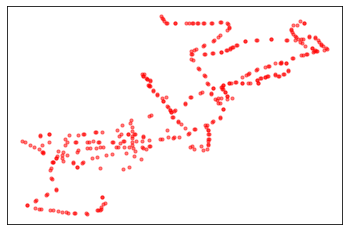

In [ ]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(G,pos=pos,node_size=10,node_color='red',alpha=.5)
#nx.draw_networkx_edges(G,pos=pos,edge_color='gray', alpha=.002)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)

plt.show()
mplleaflet.display(fig=fig)

raw 데이터를 이용해서 인접 노드를 연결한 네트워크 형성 및 시각화

In [ ]:
node_inf=pd.read_csv('/gdrive/My Drive/BP_node_in_project.csv')  
node_inf.head()

,Unnamed: 0,line_ID,line,num,NODE_ID,ARS-ID,station,lat,lon
0,0,100100124,0017,28,102000001,3001,한강대교북단.LG유플러스,126.963173,37.524101
1,1,100100124,0017,29,102000003,3003,신용산역,126.966144,37.527280
2,2,104000007,01A,1,101000006,2006,서울역버스환승센터,126.972773,37.555475
3,3,104000007,01A,2,101000018,2110,경찰청.동북아역사재단,126.969006,37.562993
4,4,104000007,01A,3,101000020,2113,서대문경찰서.농협은행.유관순활동터,126.967656,37.564848


In [ ]:
ids=pd.unique(node_inf['NODE_ID'])
lines=pd.unique(node_inf['line_ID'])
G = nx.Graph()
G.add_nodes_from(ids)

In [ ]:
for i in lines:
    line=node_inf[node_inf['line_ID']==i]
    line['des']=line['NODE_ID'].shift(-1)
    line['X']=line['lat'].shift(-1)
    line['Y']=line['lon'].shift(-1)
    line=line.dropna()
    line['des']=line['des'].astype('int')
    G.add_edges_from(line[['NODE_ID','des']].to_numpy())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

빨간 점은 버스 정거장, 회색 선은 두 정거장을 잇는 버스 노선을 의미.

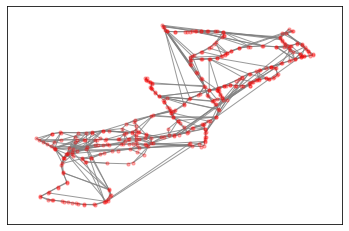

In [ ]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(G,pos=pos,node_size=10,node_color='red',alpha=.3)
nx.draw_networkx_edges(G,pos=pos,edge_color='gray', alpha=.8)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)

plt.show()
mplleaflet.display(fig=fig)

직선거리보다 3배 비효율적인 버스 노선을 가진 pair만 추출(ratio>3) 

In [ ]:
comb=pd.read_csv('/gdrive/My Drive/BP_comb.csv')
sel=comb[comb.ratio>3]

In [ ]:
gs = nx.Graph()
gs.add_nodes_from(station)
gs.add_weighted_edges_from(sel[['ori','des','ratio']].to_numpy())

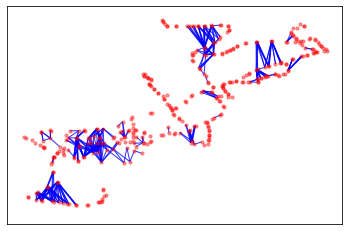

In [ ]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(gs,pos=pos,node_size=10,node_color='red',alpha=.4)
nx.draw_networkx_edges(gs,pos=pos,edge_color='blue', alpha=.8)
#nx.draw_networkx_labels(G,pos=pos, font_size=10)

plt.show()
mplleaflet.display(fig=fig)

아직 너무 많은 비효율 구간이 존재. 걸어가기 힘들 정도로 먼 거리인 1.3km 이상으로 국한하여 분석.(dist>1.3)

In [ ]:
sel2=sel[sel.dist>1.3]

In [ ]:
gs2 = nx.Graph()
gs2.add_nodes_from(station)
gs2.add_weighted_edges_from(sel2[['ori','des','ratio']].to_numpy())

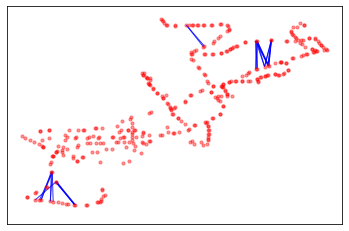

In [ ]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(gs2,pos=pos,node_size=10,node_color='red',alpha=.4)
nx.draw_networkx_edges(gs2,pos=pos,edge_color='blue', alpha=.8)



plt.show()
mplleaflet.display(fig=fig)

크게 세 구역이 비효율적인 구간으로 나타남. 버스 노선 네트워크와 같이 나타내보자.

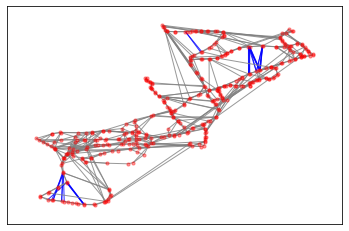

In [ ]:
fig, ax = plt.subplots()

nx.draw_networkx_nodes(gs2,pos=pos,node_size=10,node_color='red',alpha=.4)
nx.draw_networkx_edges(gs2,pos=pos,edge_color='blue', alpha=.8)
nx.draw_networkx_edges(G,pos=pos,edge_color='gray', alpha=.8)


plt.show()
mplleaflet.display(fig=fig)

실제로 버스 노선(회색 선)이 존재하지 않는 위치에 파란색 선(비효율 구간)이 존재하는 것을 확인할 수 있다. 